This project was created to predict the order of pizza from pizzerias in Lviv by 4 parameters (weight, price, type of pizza, mark) using KNeighborsClassifier.

Dataset was created according to the Glovo delivery service. For pizza_type was taken 5 of the most typical types of pizza and one special type from each company. The marks of the pizza was taken from the general reviews of a particular company.

Pizza_type numbers in dataset Hawaiian = 1, capricciosa = 2, pepperoni = 3, hot = 4, formagi = 5, special = 6

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
pizza = pd.read_excel('pizza_lviv.xlsx')

In [5]:
pizza.head()

,company,pizza_type,weight,priсe,mark
0,la pec,2,465,181,6
1,la pec,1,560,175,6
2,la pec,3,415,184,7
3,la pec,4,445,173,6
4,la pec,5,440,217,7


In [6]:
pizza.describe()

,pizza_type,weight,priсe,mark
count,92.000000,92.000000,92.000000,92.000000
mean,3.586957,507.184783,196.478261,6.597826
std,1.748797,166.565760,54.403757,1.430129
min,1.000000,250.000000,32.000000,4.000000
25%,2.000000,390.000000,164.750000,5.000000
50%,4.000000,460.000000,188.000000,7.000000
75%,5.000000,591.000000,231.000000,8.000000
max,6.000000,900.000000,347.000000,9.000000


In [7]:
pizza.isna().sum()

company       0
pizza_type    0
weight        0
priсe         0
mark          0
dtype: int64

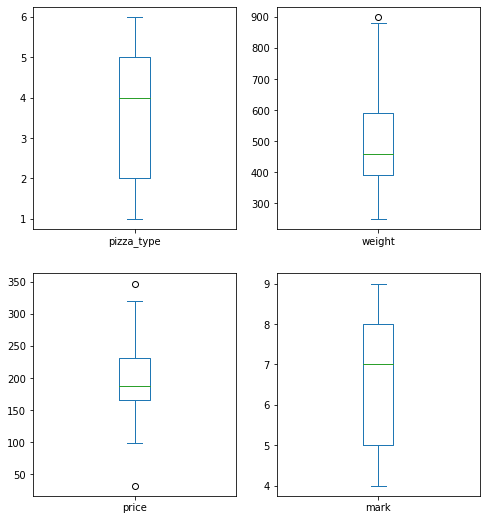

In [8]:
pizza.plot(kind='box', layout=(2,2),figsize=(8,9), subplots=True, sharey = False)

plt.show()

C:\Users\user\anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company', ylabel='count'>

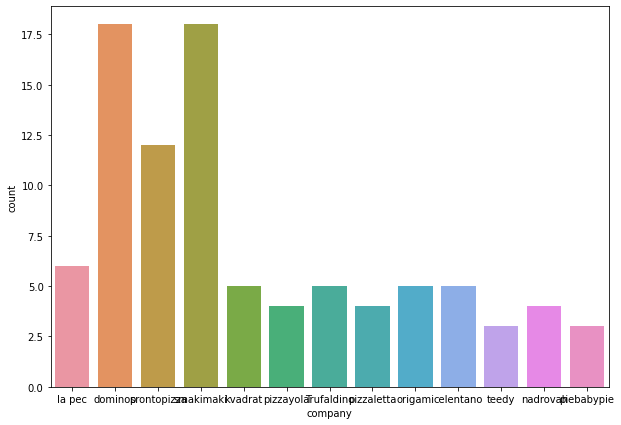

In [11]:
# how much repeat the company ?

plt.figure(figsize=(10,7))
sns.countplot(pizza["company"])

In [13]:
# Prices in companies

avg=pizza.groupby("company")["priсe"].agg(["max","min","mean"])
avg

,max,min,mean
company,,,
Trufaldino,223,162,195.000000
celentano,221,135,178.000000
dominos,320,121,221.944444
kvadrat,172,105,146.400000
la pec,217,173,189.166667
nadrovah,195,135,163.000000
origami,245,187,205.600000
piebabypie,260,230,246.666667
pizzaletta,215,164,188.750000


<AxesSubplot:xlabel='company'>

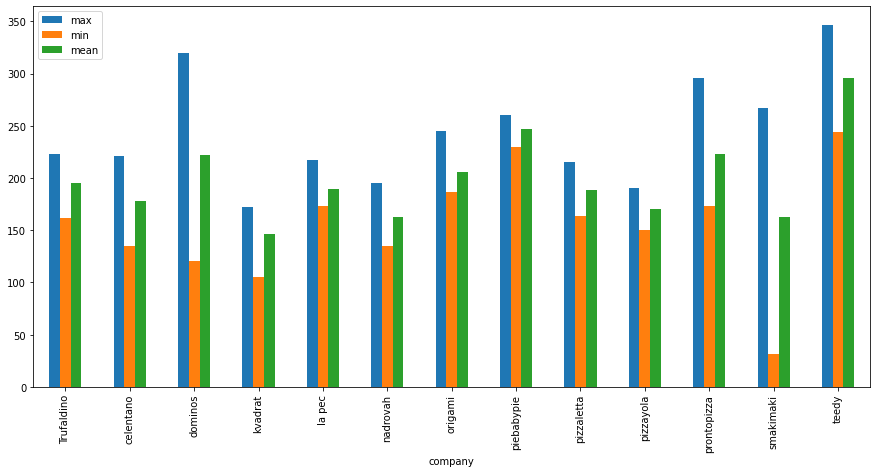

In [14]:
# Visualisation group by company

avg.plot(kind='bar',figsize=(15,7))

In [16]:
# group the to show how the average price for the Type. 
#Hawaiian = 1, capricciosa = 2, pepperoni = 3, hot = 4, formagi = 5, special = 6

T_avg=pizza.groupby("pizza_type")["priсe"].agg(["max","min","mean"])
T_avg

,max,min,mean
pizza_type,,,
1,274,105,185.733333
2,283,114,194.933333
3,347,106,196.214286
4,298,99,192.928571
5,320,117,215.882353
6,297,32,191.058824


In [19]:
# filter company Domino's Pizza 's Pizza

pizza_DP=pizza[(pizza["company"]=="dominos")]
pizza_DP.sort_values(by="priсe",ascending=False)

,company,pizza_type,weight,priсe,mark
8,dominos,5,814,320,8
7,dominos,5,600,299,8
20,dominos,4,820,298,8
14,dominos,2,800,283,8
11,dominos,1,900,262,7
19,dominos,4,634,257,8
13,dominos,2,588,247,8
23,dominos,6,840,231,8
17,dominos,3,831,231,9
10,dominos,1,645,221,7


<AxesSubplot:xlabel='weight', ylabel='priсe'>

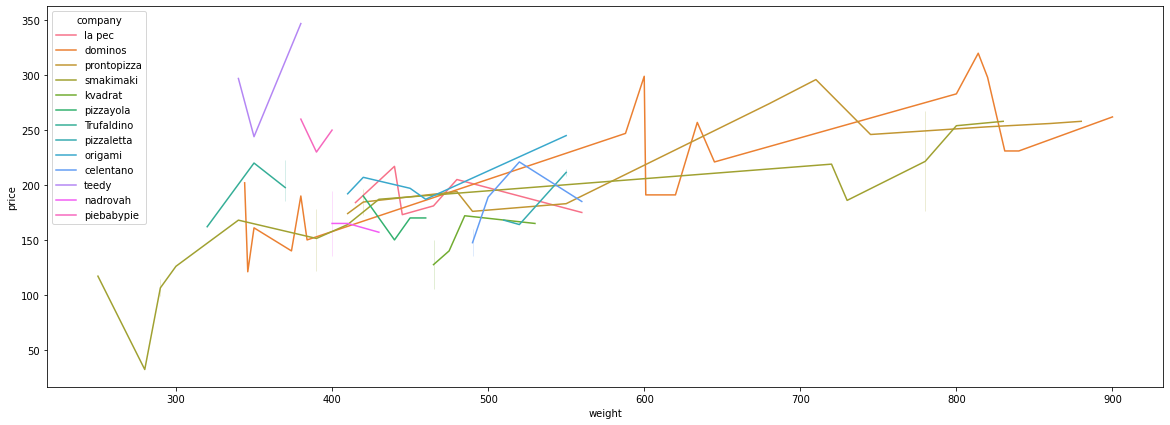

In [22]:
# using seaborn line plot about the weight with price

plt.figure(figsize=(20,7))
sns.lineplot(data=pizza,x="weight",y="priсe",hue="company")

array([[<AxesSubplot:xlabel='pizza_type', ylabel='pizza_type'>,
        <AxesSubplot:xlabel='weight', ylabel='pizza_type'>,
        <AxesSubplot:xlabel='priсe', ylabel='pizza_type'>],
       [<AxesSubplot:xlabel='pizza_type', ylabel='weight'>,
        <AxesSubplot:xlabel='weight', ylabel='weight'>,
        <AxesSubplot:xlabel='priсe', ylabel='weight'>],
       [<AxesSubplot:xlabel='pizza_type', ylabel='priсe'>,
        <AxesSubplot:xlabel='weight', ylabel='priсe'>,
        <AxesSubplot:xlabel='priсe', ylabel='priсe'>]], dtype=object)

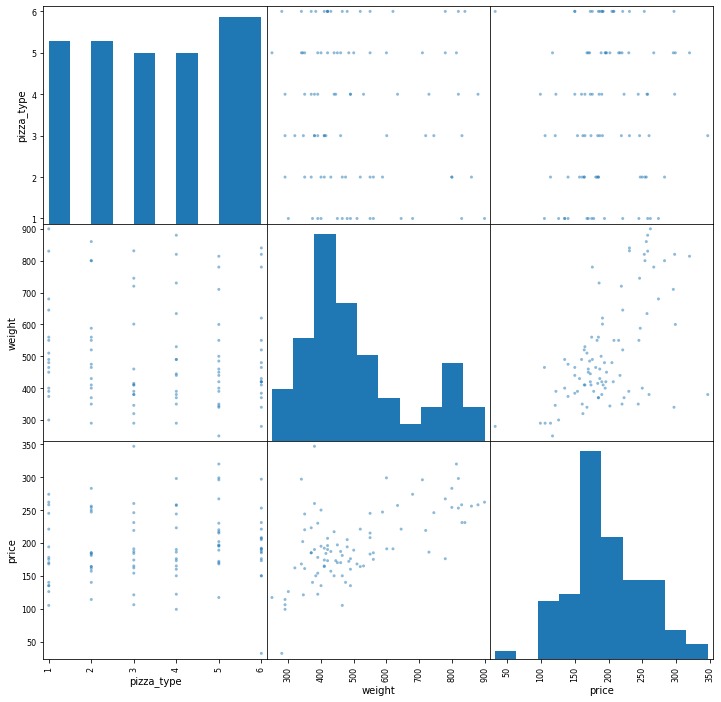

In [23]:
atts = ['pizza_type','weight','priсe']
scatter_matrix(pizza[atts], figsize=(12,12))

In [24]:
X = pizza[['pizza_type','weight', 'priсe']]
y = pizza['company']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.34782608695652173

In [26]:
error_rate = []
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
print(error_rate)

[0.6521739130434783, 0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.6521739130434783, 0.6521739130434783, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.6956521739130435, 0.7391304347826086, 0.782608695652174, 0.782608695652174, 0.7391304347826086, 0.7391304347826086, 0.782608695652174, 0.782608695652174, 0.8260869565217391, 0.8260869565217391]


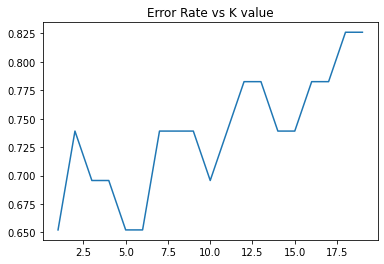

In [27]:
plt.plot(range(1,20), error_rate)
plt.title('Error Rate vs K value')
plt.show()

Predicting pizzas company by parameters

In [28]:
pizza_prediction = knn.predict([[1, 500, 200]])
pizza_prediction[0]

C:\Users\user\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'la pec'